# Data Science Union - Max Matkovski

In [54]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [5]:
# read in data set

df = pd.read_csv('airbnb_listings.csv')

In [144]:
# look at data

df.head()

,name,number_of_reviews,review_scores_value,cancellation_policy,host_id,host_name,host_for_x_days,host_response_time,host_response_rate,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
0,Charming room in pet friendly apt,36,9,2,2572247,Andrea,3389,within an hour,100,Apartment,Private room,2,65,95,10,2,15
1,Spacious Sunny Bedroom Suite in Historic Home,1,10,2,6031442,Meghna,3071,within a few hours,100,House,Private room,4,75,100,50,1,1125
2,Perfect & Practical Boston Rental,33,9,3,4434391,Damon,3195,within an hour,100,Apartment,Entire home/apt,5,229,200,50,4,10
3,Quiet Beauty in Boston,7,9,2,9658771,Anthony,2882,within a day,75,House,Entire home/apt,2,145,500,150,3,1125
4,Arborside Guest Cottage,16,10,2,74531248,Carl & Judy,1938,within an hour,100,House,Entire home/apt,3,120,150,50,2,6


In [13]:
# how many total properties are apartments with moderate cancellation policy?

df[(df['property_type'] == 'Apartment') & (df['cancellation_policy'] == 2 )].count()

name                   189
number_of_reviews      189
review_scores_value    189
cancellation_policy    189
host_id                189
host_name              189
host_for_x_days        189
host_response_time     189
host_response_rate     189
property_type          189
room_type              189
accommodates           189
price                  189
security_deposit       189
cleaning_fee           189
minimum_nights         189
maximum_nights         189
dtype: int64

In [14]:
# how many total properties are there?

df.count()

name                   939
number_of_reviews      939
review_scores_value    939
cancellation_policy    939
host_id                939
host_name              939
host_for_x_days        939
host_response_time     939
host_response_rate     939
property_type          939
room_type              939
accommodates           939
price                  939
security_deposit       939
cleaning_fee           939
minimum_nights         939
maximum_nights         939
dtype: int64

In [73]:
# total moderate apartments / total

percentage = round((189 / 939)*100,3)

In [74]:
print('A total of ', percentage,'% properties are moderate apartments.')

A total of  20.128 % properties are moderate apartments.


In [75]:
# What's the second most common name in the dataset?

item_counts = df['host_name'].value_counts()
item_counts.sort_values(ascending=True)
item_counts.head(10)

Flatbook    35
Jason       25
Will        21
Brent       15
Marie       14
Jonathan    14
Orchid      14
Paige       12
Anne        11
Alan        10
Name: host_name, dtype: int64

In [76]:
# How many different people have the name "Jason"?

df1 = df[df['host_name']=='Jason']
df1['host_id'].nunique()

7

In [77]:
# Frequency of "Jason" occurence?

df1['host_id'].value_counts()

9410008     15
5028116      4
31035017     2
25757249     1
20447366     1
88129265     1
29806038     1
Name: host_id, dtype: int64

In [95]:
loft = df[df['property_type']=='Loft']
townhouse = df[df['property_type']=='Townhouse']

loft_prices = loft['price']
townhouse_prices = townhouse['price']

In [104]:
# Performing a two sample T-test on the price dataframes

stats.ttest_ind(loft_prices,townhouse_prices)

Ttest_indResult(statistic=0.6983639824180281, pvalue=0.49070954759543484)

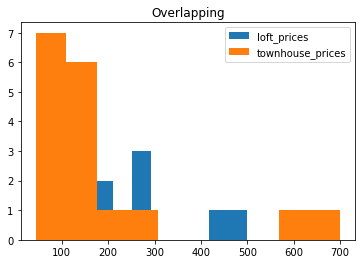

In [102]:
plt.hist(loft_prices, label='loft_prices')
plt.hist(townhouse_prices, label='townhouse_prices')

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

In [113]:
df

,name,number_of_reviews,review_scores_value,cancellation_policy,host_id,host_name,host_for_x_days,host_response_time,host_response_rate,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
0,Charming room in pet friendly apt,36,9,2,2572247,Andrea,3389,within an hour,100,Apartment,Private room,2,65,95,10,2,15
1,Spacious Sunny Bedroom Suite in Historic Home,1,10,2,6031442,Meghna,3071,within a few hours,100,House,Private room,4,75,100,50,1,1125
2,Perfect & Practical Boston Rental,33,9,3,4434391,Damon,3195,within an hour,100,Apartment,Entire home/apt,5,229,200,50,4,10
3,Quiet Beauty in Boston,7,9,2,9658771,Anthony,2882,within a day,75,House,Entire home/apt,2,145,500,150,3,1125
4,Arborside Guest Cottage,16,10,2,74531248,Carl & Judy,1938,within an hour,100,House,Entire home/apt,3,120,150,50,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,"Allston, close to Harvard Business School + BU D",32,10,1,19548932,Joe,2599,within an hour,100,House,Private room,2,75,100,35,1,1125
935,"3B2B parking,MIT/Havard,BU,Fenway, near 2T sta...",38,9,3,19008767,Ellen,2609,within an hour,100,Apartment,Entire home/apt,8,329,100,90,1,1125
936,Big Room at Brookline Hill in Boston,4,9,2,45902201,Wencai,2173,within a few hours,100,Apartment,Private room,1,39,100,20,1,1125
937,It's always more fun on the water,4,10,2,28364516,Ryan,2396,within a few hours,100,Boat,Private room,7,229,500,100,2,1125


In [116]:
# group by room type

df.groupby('room_type').review_scores_value.mean()

room_type
Entire home/apt    9.253894
Private room       9.089965
Shared room        9.375000
Name: review_scores_value, dtype: float64

In [142]:
grouped_means = df.groupby('room_type').mean()
grouped_means

,number_of_reviews,review_scores_value,cancellation_policy,host_id,host_for_x_days,host_response_rate,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
room_type,,,,,,,,,,,,
Entire home/apt,26.467290,9.253894,2.574766,2.016078e+07,2840.609034,95.540498,4.252336,226.489097,374.291277,85.699377,2.967290,802.749221
Private room,31.484429,9.089965,2.332180,2.201198e+07,2772.435986,97.013841,2.017301,86.031142,210.550173,35.352941,3.148789,731.577855
Shared room,21.500000,9.375000,2.625000,2.329613e+07,2823.000000,95.875000,1.375000,72.625000,371.750000,29.875000,1.250000,429.625000


In [130]:
grouped_means
del grouped_means['host_for_x_days']

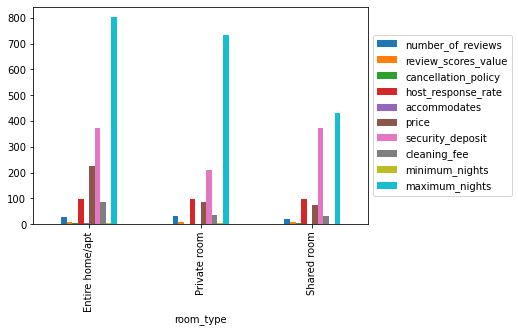

In [141]:
# comparison of variables based on room type
%matplotlib inline
plt = grouped_means.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))


In [ ]:
# What should Flatbook do?

In [145]:
df1

,name,number_of_reviews,review_scores_value,cancellation_policy,host_id,host_name,host_for_x_days,host_response_time,host_response_rate,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
16,Qn BR/Private Bath/Superhost/JP Ctr,17,9,3,5028116,Jason,3142,within a few hours,100,Apartment,Private room,2,120,500,80,1,1125
36,Funky Alcove for 2/Superhost/JP Ctr,10,10,3,5028116,Jason,3142,within a few hours,100,Apartment,Shared room,2,100,500,50,1,1125
57,Qn BR/deck/Jacuzzi/Superhost/JP Ctr,5,10,3,5028116,Jason,3142,within a few hours,100,Condominium,Private room,2,120,500,80,1,1125
89,Lovely 2BR+ 2BA JP Cntr/Superhost,3,9,3,5028116,Jason,3142,within a few hours,100,House,Entire home/apt,6,250,1000,100,1,1125
144,North End 2 BR | 1 BA Duplex in Little Italy,7,9,3,9410008,Jason,2896,within an hour,100,Apartment,Entire home/apt,6,320,450,100,3,30
174,Spacious North End 1 BR | 1BA,67,10,3,9410008,Jason,2896,within an hour,100,Apartment,Entire home/apt,4,199,450,80,3,45
176,Large 2 BR | 1BA in the North End,48,10,3,9410008,Jason,2896,within an hour,100,Apartment,Entire home/apt,6,325,450,100,2,60
192,North End 1 BR Gem in Little Italy,30,10,3,9410008,Jason,2896,within an hour,100,Apartment,Entire home/apt,4,195,375,80,2,45
195,"Sweet Spot, Fort hill",2,8,3,31035017,Jason,2351,within an hour,100,Apartment,Entire home/apt,2,145,100,8,1,1125
308,Nice South End Condo.,24,10,3,29806038,Jason,2371,within a few hours,100,Apartment,Entire home/apt,3,225,200,60,2,30


In [148]:
# create data frame 

flatbook = df[df['host_name']=='Flatbook']

In [149]:
flatbook

,name,number_of_reviews,review_scores_value,cancellation_policy,host_id,host_name,host_for_x_days,host_response_time,host_response_rate,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
130,Chic 2BR Near Boston Common,3,9,3,12243051,Flatbook,2772,within a few hours,71,Loft,Entire home/apt,4,259,400,95,3,1125
132,Roomy 2BR close to Boston Common,1,10,3,12243051,Flatbook,2772,within a few hours,71,Loft,Entire home/apt,4,269,400,95,3,1125
196,Spacious 3BR in South End,2,8,3,12243051,Flatbook,2772,within a few hours,71,Apartment,Entire home/apt,6,209,400,95,3,1125
220,Stylish 2BR in Lower Roxbury,2,9,3,12243051,Flatbook,2772,within a few hours,71,Apartment,Entire home/apt,4,229,400,95,3,1125
222,Chic 3BR in Lower Roxbury,3,10,3,12243051,Flatbook,2772,within a few hours,71,Apartment,Entire home/apt,6,229,400,95,3,1125
244,"Luxe 2BR w/ Skyline Views, Gym",18,9,3,12243051,Flatbook,2772,within a few hours,71,Condominium,Entire home/apt,4,299,400,75,3,1125
245,Sleek Downtown 1BR by T w/Pool,4,9,3,12243051,Flatbook,2772,within a few hours,71,Condominium,Entire home/apt,2,269,400,95,3,1125
246,"Luxe 1BR in South End w/ Gym, Pool",20,10,3,12243051,Flatbook,2772,within a few hours,71,Apartment,Entire home/apt,4,189,400,80,3,1125
248,2BR South End Condo w/Big Windows,19,10,3,12243051,Flatbook,2772,within a few hours,71,Condominium,Entire home/apt,4,279,400,95,3,1125
249,"Luxe South End 1BR w/ Pool, Gym",14,10,3,12243051,Flatbook,2772,within a few hours,71,Condominium,Entire home/apt,4,289,400,75,3,1125


In [154]:
df

,name,number_of_reviews,review_scores_value,cancellation_policy,host_id,host_name,host_for_x_days,host_response_time,host_response_rate,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
0,Charming room in pet friendly apt,36,9,2,2572247,Andrea,3389,within an hour,100,Apartment,Private room,2,65,95,10,2,15
1,Spacious Sunny Bedroom Suite in Historic Home,1,10,2,6031442,Meghna,3071,within a few hours,100,House,Private room,4,75,100,50,1,1125
2,Perfect & Practical Boston Rental,33,9,3,4434391,Damon,3195,within an hour,100,Apartment,Entire home/apt,5,229,200,50,4,10
3,Quiet Beauty in Boston,7,9,2,9658771,Anthony,2882,within a day,75,House,Entire home/apt,2,145,500,150,3,1125
4,Arborside Guest Cottage,16,10,2,74531248,Carl & Judy,1938,within an hour,100,House,Entire home/apt,3,120,150,50,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,"Allston, close to Harvard Business School + BU D",32,10,1,19548932,Joe,2599,within an hour,100,House,Private room,2,75,100,35,1,1125
935,"3B2B parking,MIT/Havard,BU,Fenway, near 2T sta...",38,9,3,19008767,Ellen,2609,within an hour,100,Apartment,Entire home/apt,8,329,100,90,1,1125
936,Big Room at Brookline Hill in Boston,4,9,2,45902201,Wencai,2173,within a few hours,100,Apartment,Private room,1,39,100,20,1,1125
937,It's always more fun on the water,4,10,2,28364516,Ryan,2396,within a few hours,100,Boat,Private room,7,229,500,100,2,1125


In [242]:
# group by host id

host_grouped = df.groupby('host_id')

In [243]:
host_grouped_counts = host_grouped.count()

In [245]:
host_grouped_counts.sort_values(by="number_of_reviews", ascending=False)

,name,number_of_reviews,review_scores_value,cancellation_policy,host_name,host_for_x_days,host_response_time,host_response_rate,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
host_id,,,,,,,,,,,,,,,,
12243051,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
1444340,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
814298,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
9410008,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
16442921,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16343599,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15862012,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15760345,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Most common host_id's
1. 12243051
2. 1444340
3. 814298
4. 9410008
5. 16442921

In [246]:
# create data frame with top five most prevalent hosts
top_five = df[(df['host_id']==12243051) 
| (df['host_id']==1444340) 
| (df['host_id']== 814298) 
| (df['host_id']== 9410008) 
| (df['host_id']==166442921)]

top_five.head()


,name,number_of_reviews,review_scores_value,cancellation_policy,host_id,host_name,host_for_x_days,host_response_time,host_response_rate,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights
130,Chic 2BR Near Boston Common,3,9,3,12243051,Flatbook,2772,within a few hours,71,Loft,Entire home/apt,4,259,400,95,3,1125
132,Roomy 2BR close to Boston Common,1,10,3,12243051,Flatbook,2772,within a few hours,71,Loft,Entire home/apt,4,269,400,95,3,1125
144,North End 2 BR | 1 BA Duplex in Little Italy,7,9,3,9410008,Jason,2896,within an hour,100,Apartment,Entire home/apt,6,320,450,100,3,30
174,Spacious North End 1 BR | 1BA,67,10,3,9410008,Jason,2896,within an hour,100,Apartment,Entire home/apt,4,199,450,80,3,45
176,Large 2 BR | 1BA in the North End,48,10,3,9410008,Jason,2896,within an hour,100,Apartment,Entire home/apt,6,325,450,100,2,60


In [247]:
# get means 

top_five_grouped_mean = top_five.groupby('host_id').mean()

### Create Bar Graphs to Show Difference in Variable One by one 

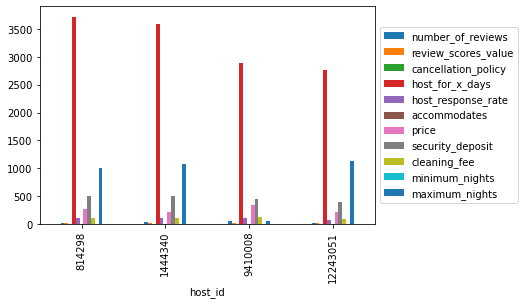

In [229]:
%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))


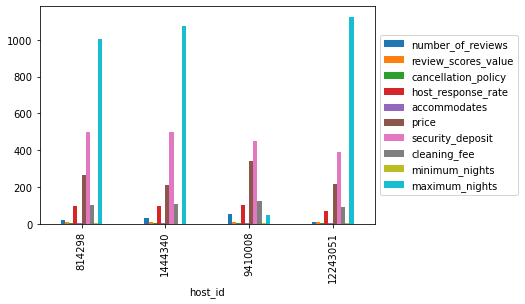

In [230]:
del top_five_grouped_mean['host_for_x_days']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

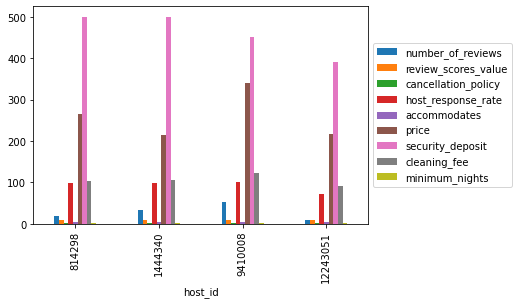

In [231]:
del top_five_grouped_mean['maximum_nights']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

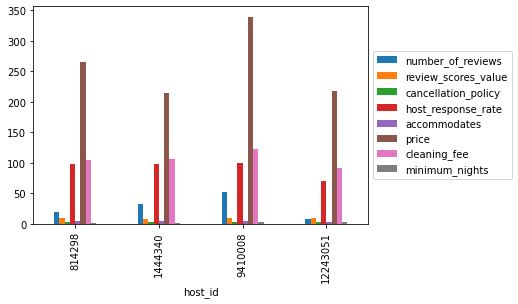

In [232]:
del top_five_grouped_mean['security_deposit']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

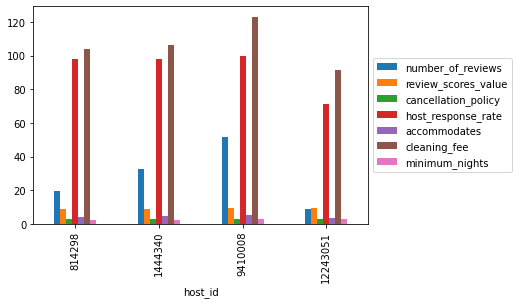

In [233]:
del top_five_grouped_mean['price']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

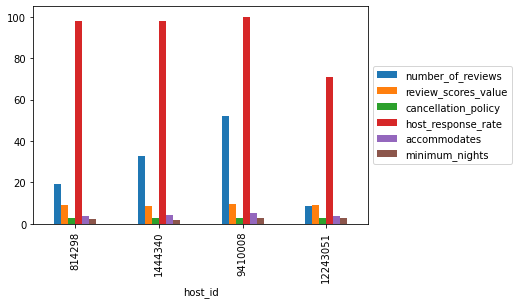

In [234]:
del top_five_grouped_mean['cleaning_fee']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

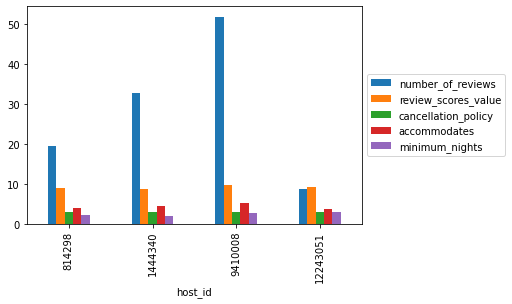

In [235]:
del top_five_grouped_mean['host_response_rate']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

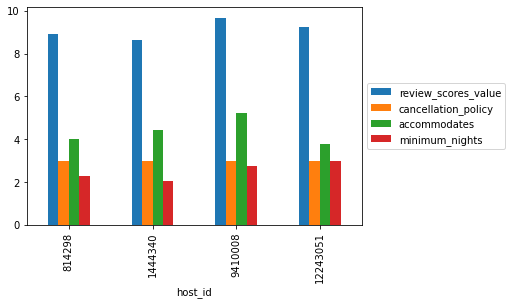

In [236]:
del top_five_grouped_mean['number_of_reviews']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

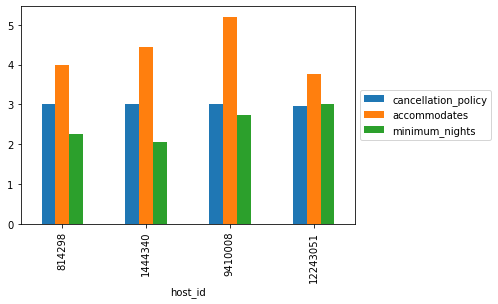

In [237]:
del top_five_grouped_mean['review_scores_value']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

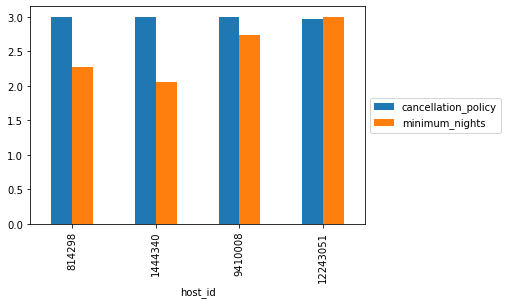

In [238]:
del top_five_grouped_mean['accommodates']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

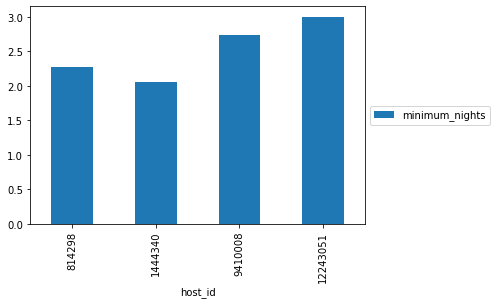

In [239]:
del top_five_grouped_mean['cancellation_policy']

%matplotlib inline
plt = top_five_grouped_mean.plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))